
# **Importing Libraries and dataset**

In [2]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/ankushsharma0904/MachineLearning/master/DATA/original_data.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
# Distribution of Numerical variales
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


# **Exploratory Data Analysis (EDA)**

In [4]:
#  DATA STATISTICS

print("\t\t\tDataset Statistics")
print("Number of columns:-",len(df.columns))
print("Number of observations:-",df.shape[0])
print("Missing Values:-",df.isna().sum().sum())
print("Missing Values %:-",round(df.isna().sum().sum()/df.shape[0]*100,3))
print("Duplicate rows:-",df[df.duplicated(keep="first")].shape[0])
print("Duplicate rows%:-",round(df[df.duplicated(keep="first")].shape[0]/df.shape[0]*100,3))
print("Variable types:-")
a=pd.crosstab(df.dtypes,columns="Count")
for i in pd.crosstab(df.dtypes,columns="Count").index:
    print("\t",str(i).split()[0],a.loc[i][0])

			Dataset Statistics
Number of columns:- 12
Number of observations:- 50000
Missing Values:- 18926
Missing Values %:- 37.852
Duplicate rows:- 15
Duplicate rows%:- 0.03
Variable types:-
	 int64 8
	 object 4


In [5]:
# Date - time columns 

df["first_open"]=pd.to_datetime(df["first_open"])
df["enrolled_date"]=pd.to_datetime(df["enrolled_date"])
df['first_open_date'] = [d.date() for d in df['first_open']]
df['first_open_time'] = [d.time() for d in df['first_open']]
df=df.drop("first_open",axis=1)

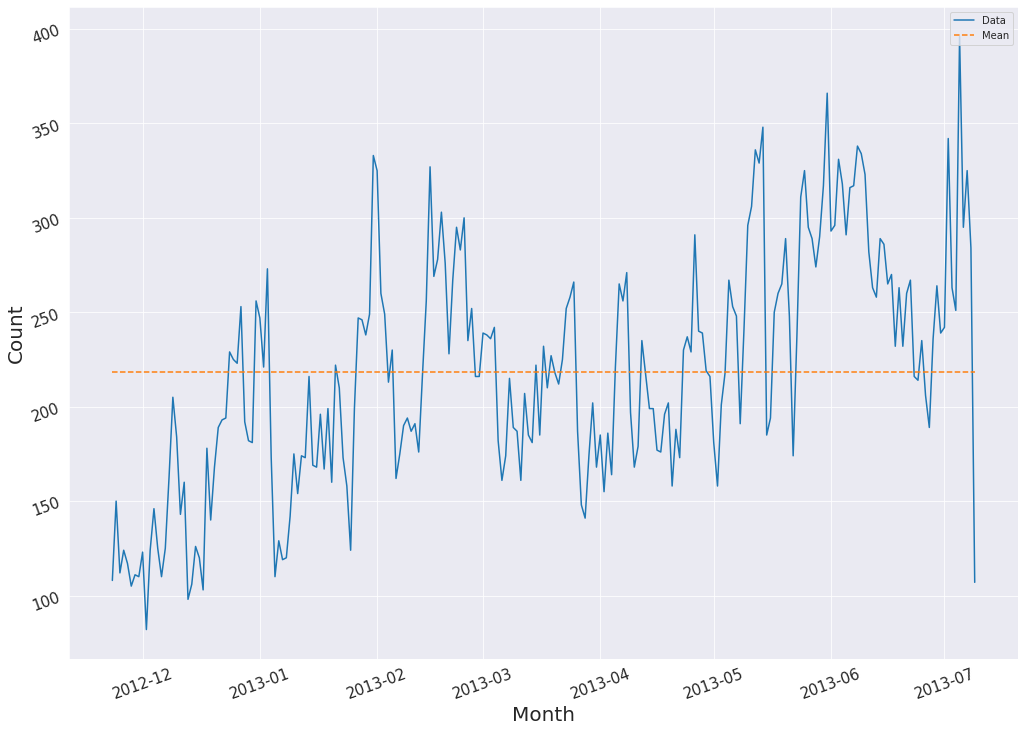

In [6]:
# Number of user logged in to the app across the month

a=pd.crosstab(index=df["first_open_date"],columns="count")
sns.set_style('darkgrid')
x =  np.arange(datetime(2012,11,23), datetime(2013,7,10), timedelta(days=1)).astype(datetime)
y = a["count"]
y_mean = [a["count"].mean()]*len(x)
fig,ax = plt.subplots(figsize=(17,12))
ax.set_xlabel("Month",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=15, labelrotation = 20, color ="k")
data_line = ax.plot(x,y, label='Data')
mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Count of on which day number of users logged in')

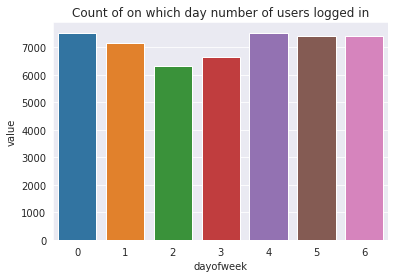

In [7]:
# Count of number of users logged in app across a week

sns.set_style('darkgrid')
ct=pd.crosstab(df["dayofweek"],columns="Count")
stacked = ct.stack().reset_index().rename(columns={0:'value'})
g=sns.barplot(x=stacked.dayofweek, y=stacked.value)
plt.title("Count of on which day number of users logged in")

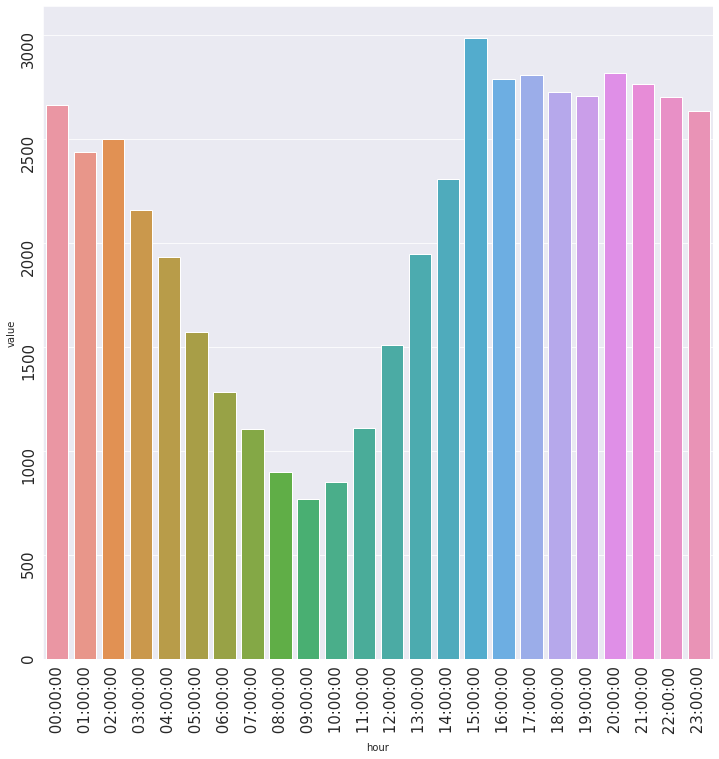

In [8]:
# Count of number of users logged in across a day

ct=pd.crosstab(df["hour"],columns="Count")
plt.figure(figsize=(12,12))
plt.tick_params(labelsize=15, labelrotation = 90, color ="k")
stacked = ct.stack().reset_index().rename(columns={0:'value'})
g=sns.barplot(x=stacked.hour, y=stacked.value)

In [9]:
df["age"].describe()

count    50000.00000
mean        31.72436
std         10.80331
min         16.00000
25%         24.00000
50%         29.00000
75%         37.00000
max        101.00000
Name: age, dtype: float64

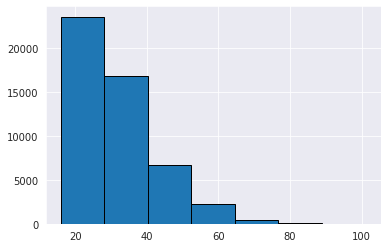

In [10]:
# Distribution of users of different age
plt.hist(df["age"],edgecolor="black",bins=7)
plt.show()

Above histogram indicates that  number of users who uses the app is maximum in between the age 20 - 30

minigame


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


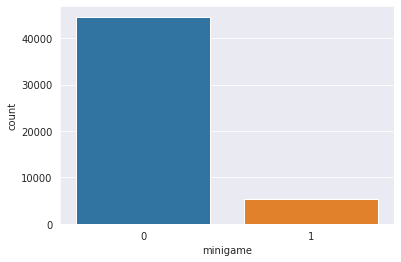

used_premium_feature


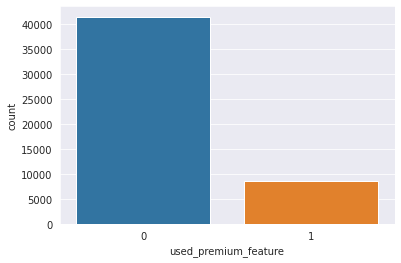

enrolled


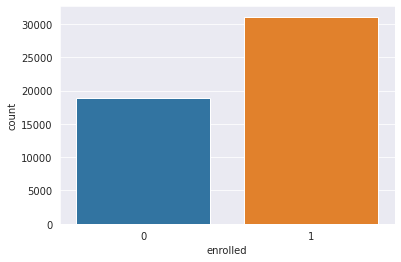

liked


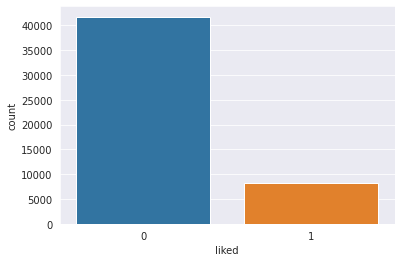

In [11]:
# Count of users across different columns in the dataset

groupedvalues=df.groupby('dayofweek')["numscreens","minigame","used_premium_feature","enrolled","liked"].sum().reset_index()
attributes=list(groupedvalues.columns)[1:]
att=attributes[1:]
for i in att:
    print(i)
    sns.countplot(df[i])
    plt.show()

numscreens


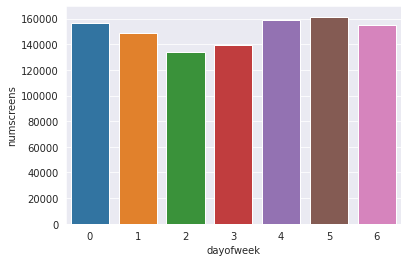

minigame


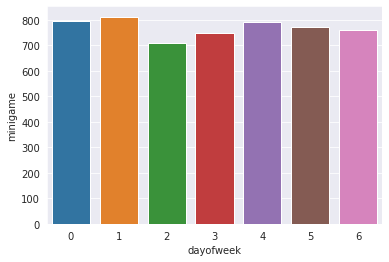

used_premium_feature


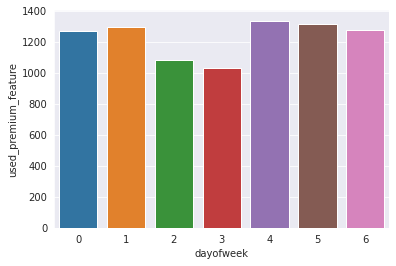

enrolled


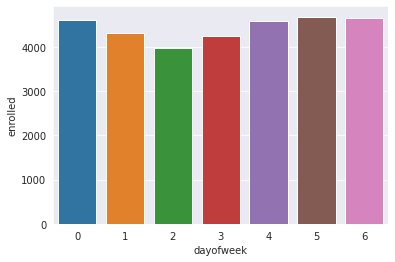

liked


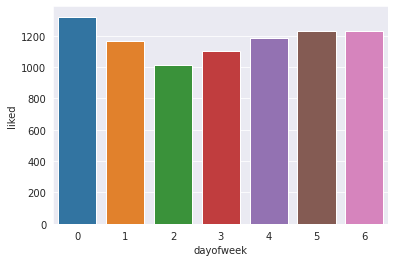

In [12]:
# Relation of different columns with days in a week

for i in attributes:
    print(i)
    sns.barplot(x="dayofweek",y=i,data=groupedvalues)
    plt.show()

numscreens


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


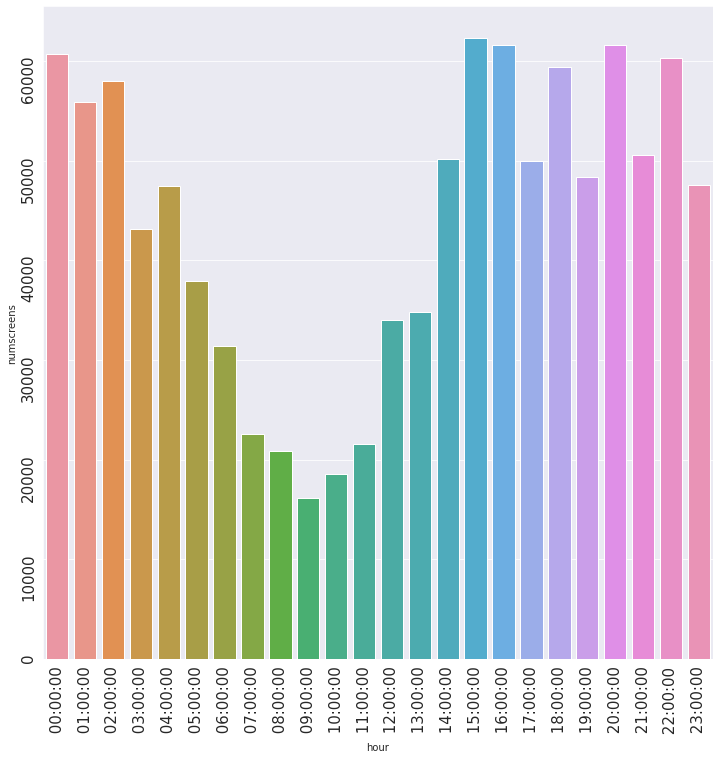

minigame


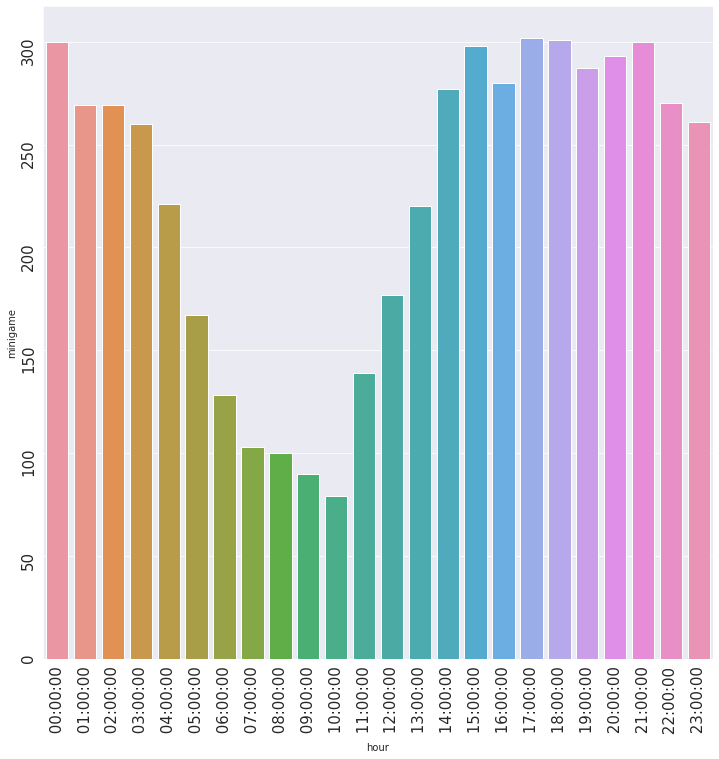

used_premium_feature


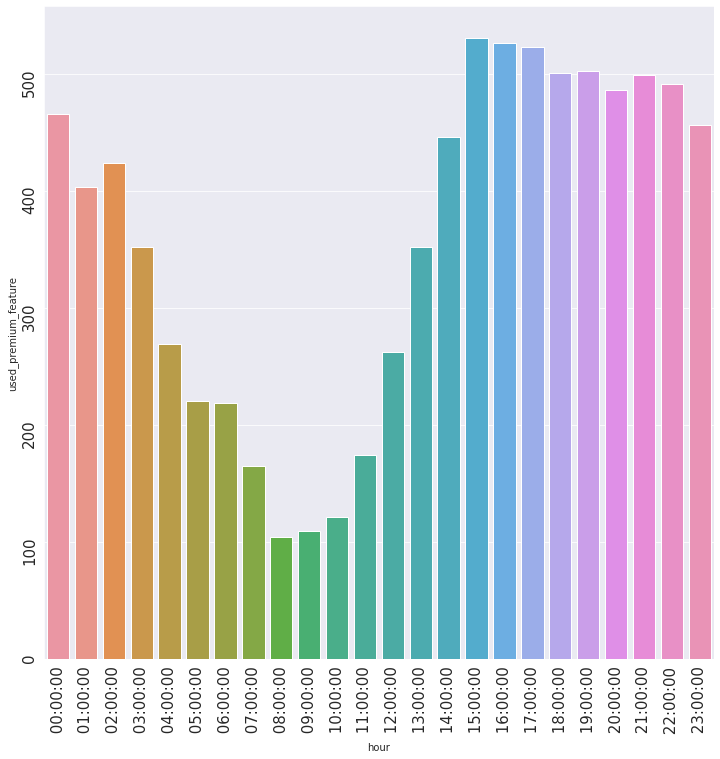

enrolled


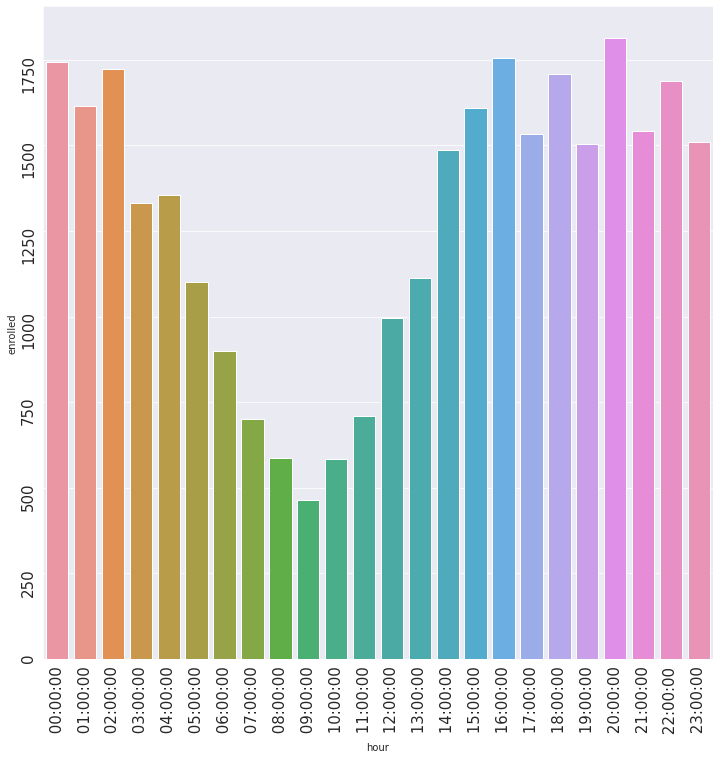

liked


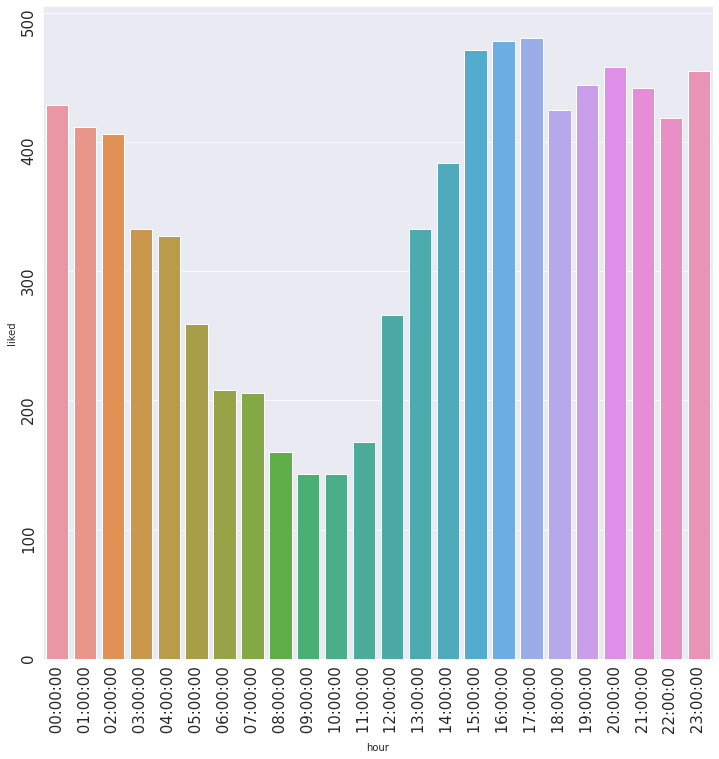

In [13]:
# Relation of different columns across different hours

groupedvalues2=df.groupby('hour')["numscreens","minigame","used_premium_feature","enrolled","liked"].sum().reset_index()
for i in attributes:
    print(i)
    plt.figure(figsize=(12,12))
    plt.tick_params(labelsize=15, labelrotation = 90, color ="k")
    sns.barplot(x="hour",y=i,data=groupedvalues2)
    plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


numscreens


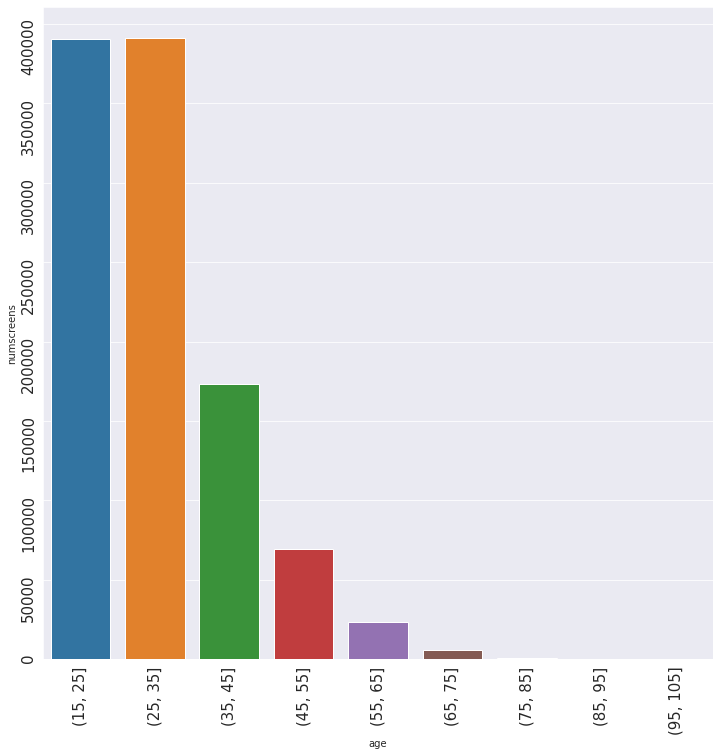

minigame


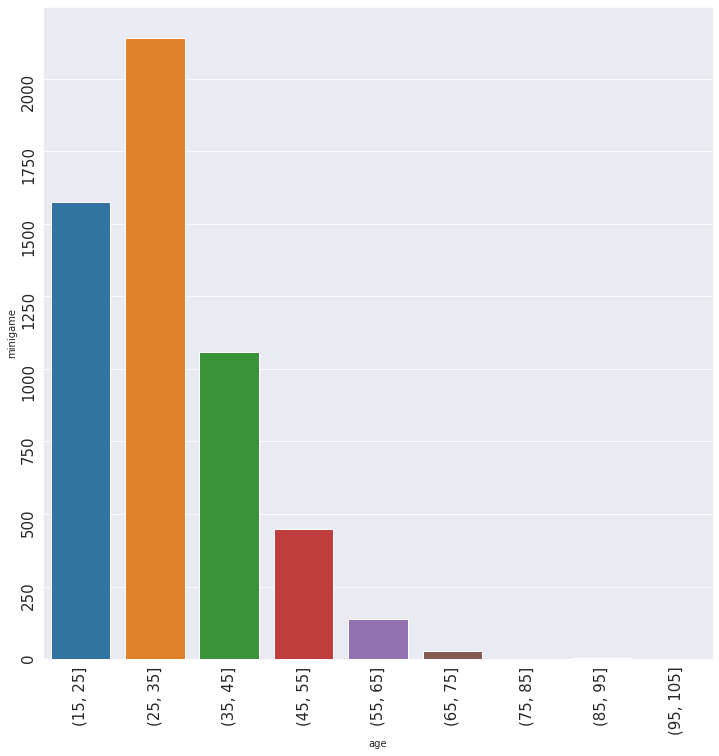

used_premium_feature


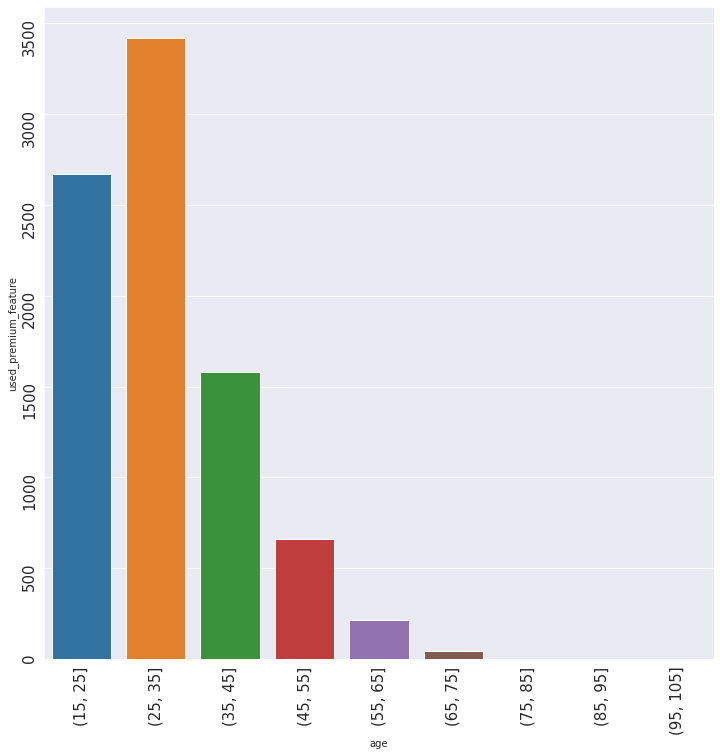

enrolled


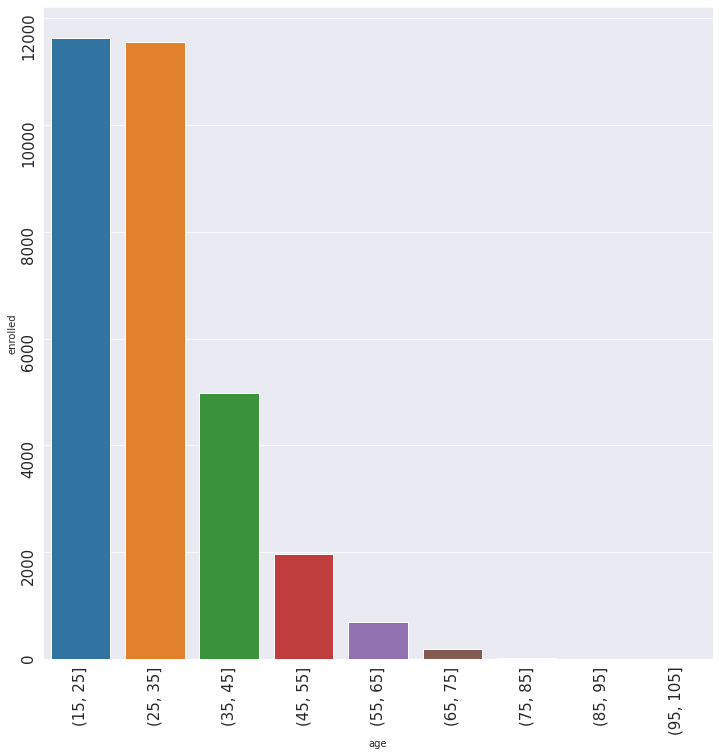

liked


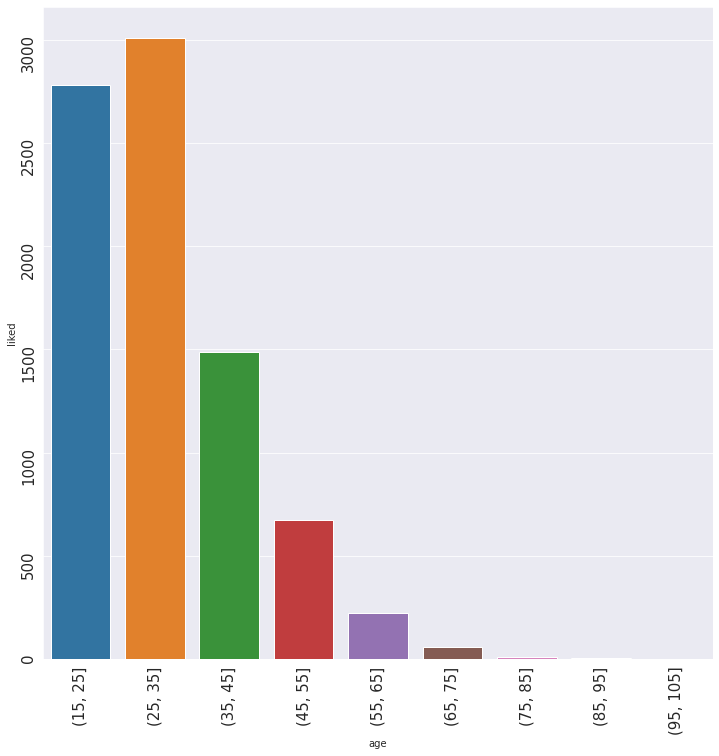

In [14]:
# Relation of different columns with age

groupedvalues3=df.groupby(pd.cut(df['age'], np.arange(15, 106, 10)))["numscreens","minigame","used_premium_feature","enrolled","liked"].sum().reset_index()
for i in attributes:
    print(i)
    plt.figure(figsize=(12,12))
    plt.tick_params(labelsize=15, labelrotation = 90, color ="k")
    sns.barplot(x="age",y=i,data=groupedvalues3)
    plt.show()

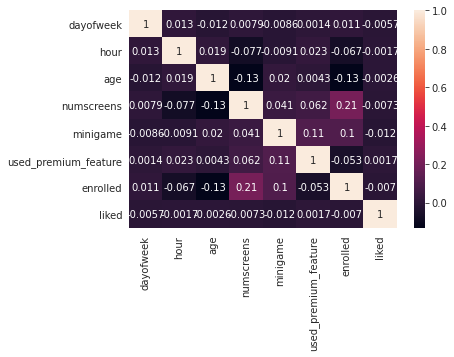

In [15]:
# Correlation matrix

for i in df.index:
    x = df.at[i , 'hour']
    y = x[0:3]
    df.at[i , 'hour'] = y
df["hour"]=df["hour"].astype('int64')
df2 = df.drop(['user',  'enrolled_date'], axis = 1)
sns.heatmap(df2.corr(), annot = True)

Above correlation matrix states that number of enrollment to subscription is mostly dependent on number of screens visited

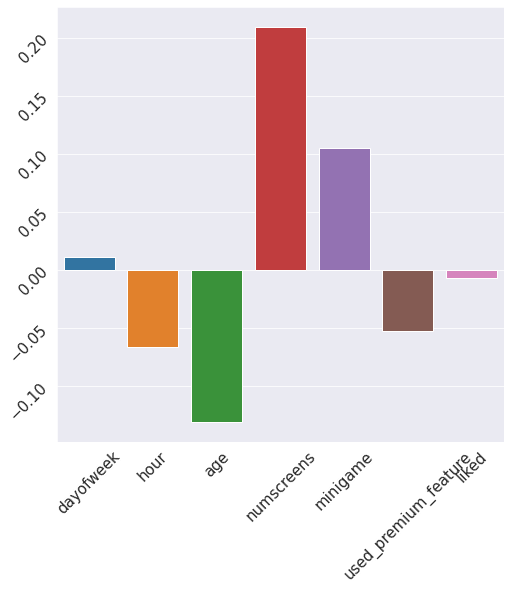

In [16]:
# Correlation with response variable

df3 = df2.drop(['enrolled'], axis = 1)
plt.figure(figsize=(8,8))
sns.barplot(x=df3.corrwith(df2.enrolled).index,y=df3.corrwith(df2.enrolled))
plt.tick_params(labelsize=15, labelrotation = 45)


 **This means that age,hour,numscreens,minigame and used_prenium_features are related**

# **Updating the dataset**

In [17]:
# Reading data set
dataset = pd.read_csv('https://raw.githubusercontent.com/ankushsharma0904/MachineLearning/master/DATA/original_data.csv')

# Droping unimportant columns
dataset.drop(['user'], axis = 1, inplace = True)

dataset['hour'] = dataset['hour'].str.slice(1, 3).astype(int)

In [18]:
                                                ''' Feature Engineering '''

# Dealing with datetime columns
dataset['first_open'] = [parser.parse(row_date) for row_date in dataset['first_open']]
dataset['enrolled_date'] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset['enrolled_date']]
dataset['difference'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

# Selecting time for response
# Converting all entries of enrolled to 0 if their correspondence difference is greater than 40
dataset.loc[dataset.difference > 40, 'enrolled'] = 0



In [19]:
# Dealing with screen list columns

for i in range(len(dataset["screen_list"])):
    dataset["screen_list"][i]=dataset["screen_list"][i].split(',')

# Mapping screens to fields
from mlxtend.preprocessing import TransactionEncoder 

transactionEncoder = TransactionEncoder()
txnn=transactionEncoder.fit(dataset["screen_list"]).transform(dataset["screen_list"])
dfnn=pd.DataFrame(txnn,columns=transactionEncoder.columns_)
dataset = dataset.join(dfnn, how = 'outer')

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=list(transactionEncoder.columns_)
for i in l:
    try:
        dataset[i]=le.fit_transform(dataset[i])
    except:
        pass

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
# Reducing number of columns

cc_count = ["CC1","CC1Category","CC3"]
credit_count = ["Credit1","Credit2","Credit3","Credit3Container","Credit3Dashboard","Credit3Alerts","Credit3CTA"]
loan_count = ["Loan","Loan1","Loan2","Loan3","Loan4"]
saving_count = ["Saving1","Saving2","Saving2Amount","Saving4","Saving5","Saving6","Saving7","Saving8","Saving9","Saving10"]
product_review_count = ["product_review","product_review2","product_review3","product_review4","product_review5"]

dataset['cc_count'] = dataset[cc_count].sum(axis = 1)
dataset.drop(cc_count, axis=1, inplace = True)

dataset['credit_count'] = dataset[credit_count].sum(axis = 1)
dataset.drop(credit_count, axis=1, inplace = True)

dataset['loan_count'] = dataset[loan_count].sum(axis = 1)
dataset.drop(loan_count, axis=1, inplace = True)

dataset['saving_count'] = dataset[saving_count].sum(axis = 1)
dataset.drop(saving_count, axis=1, inplace = True)

dataset['product_review_count'] = dataset[product_review_count].sum(axis = 1)
dataset.drop(product_review_count, axis=1, inplace = True)

In [21]:
dataset.head()

,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference,About,AccountView,AddProperty,AddVehicle,AdverseActions,Alerts,BVPlaidLinkContainer,BVStats,BankVerification,BoostFriendsList,CameraScreen,CommunityAndInvites,ContactInfoConfirm,Credits,Cycle,EditProfile,EmploymentInfo,EmploymentSummary,Finances,FindFriendsCycle,ForgotPassword,GroupedInstitutions,History,Home,IdAndSelfieCameraScreen,IdentityVerification,InstantLoanSSN,InstantOfferCreateAccount,...,ReviewCreditCard,RewardDetail,Rewardjoinscreen,Rewards,RewardsContainer,SavingGoalEdit,SavingGoalIncomeSalary,SavingGoalOther,SavingGoalPreview,ScanPreview,SecurityModal,SelectInstitution,Settings,Signup,SignupEmail,SignupName,Splash,TransactionList,VerifyAnnualIncome,VerifyBankInfo,VerifyCountry,VerifyDateOfBirth,VerifyHousing,VerifyHousingAmount,VerifyIncomeType,VerifyMobile,VerifyPhone,VerifySSN,VerifyToken,WebView,WelcomeBankVerification,YourNetwork,idscreen,joinscreen,location,cc_count,credit_count,loan_count,saving_count,product_review_count
0,2012-12-27 02:14:51.273,3,2,23,"[idscreen, joinscreen, Cycle, product_review, ...",15,0,0,0,NaT,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1
1,2012-12-02 01:16:00.905,6,1,24,"[joinscreen, product_review, product_review2, ...",13,0,0,0,NaT,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,2
2,2013-03-19 19:19:09.157,1,19,23,"[Splash, Cycle, Loan]",3,0,1,0,NaT,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2013-07-05 16:08:46.354,4,16,28,"[product_review, Home, product_review, Loan3, ...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,3,1,0,1
4,2013-02-26 18:50:48.661,1,18,31,"[idscreen, joinscreen, Cycle, Credit3Container...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,2,1,0,2


In [22]:
# Dropping updated columns
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open', 'screen_list'])

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 120 entries, dayofweek to product_review_count
dtypes: int64(120)
memory usage: 47.4 MB


Dataset updated successfully... (Rows , Columns) = (50000,120)

# **Data Pre-processing**

In [24]:
# Splitting data set to feature and target
X = dataset.drop('enrolled', axis=1)
y = dataset['enrolled']

In [25]:
# Feature scaling
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [26]:
# Splitting dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 1)

# **Model building and Implementation**

In [27]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Predicting 
y_pred_lr = model_lr.predict(X_test)


In [29]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
y_pred_dtc = model_dtc.predict(X_test)

# **Results**

In [31]:
# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_lr)
print('Logistic Regression\n')
print(f'Confusion Matrix: \n\n{cm}')
print("\nAccuracy score: ", accuracy_score(y_test, y_pred_lr) * 100)

Logistic Regression

Confusion Matrix: 

[[7877  586]
 [1555 6649]]

Accuracy score:  87.1542569148617


In [32]:
cm2 = confusion_matrix(y_test, y_pred_dtc)
print('Decision Tree Classifier\n')
print(f'Confusion Matrix: \n\n{cm2}')
print("\nAccuracy score: ", accuracy_score(y_test, y_pred_dtc) * 100)


Decision Tree Classifier

Confusion Matrix: 

[[7887  576]
 [1554 6650]]

Accuracy score:  87.2202555948881


# **Hyperparameter Tuning**

In [33]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['gini','entropy'], 'max_depth': range(2,10)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree, tuned_parameters, cv=10, scoring='roc_auc')

In [34]:
clf.fit(X_train, y_train)
clf.best_score_

0.912722398366245

In [35]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [51]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

In [52]:
print(f'Accuracy of Decision tree : {accuracy_score(y_test, pred_dtc) * 100}')


Accuracy of Decision tree : 87.1362572748545
